In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
import numpy as np

# Data Importation

In [2]:
df_movies = pd.read_csv('../../data/cleanData/movies_cleaned.csv')

df_movies.head()

,wiki_id,freebase_id,name,release_date,revenue,runtime,languages,countries,genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,NaN,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,NaN,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,NaN,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"


In [3]:
df_characters = pd.read_csv('../../data/cleanData/characters_cleaned.csv')

df_characters.head()

,wiki_id,freebase_id,release_date,character,birth_date,gender,height,ethnicity_freebase_id,name,age,character_actor_freebase_id,character_freebase_id,actor_freebase_id
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg


In [52]:
df_summary = pd.read_csv('../../data/cleanData/summaries_cleaned.csv')

df_summary.head()

,wiki_id,summary
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha..."
1,31186339,The nation of Panem consists of a wealthy Capi...
2,20663735,Poovalli Induchoodan is sentenced for six yea...
3,2231378,"The Lemon Drop Kid , a New York City swindler,..."
4,595909,Seventh-day Adventist Church pastor Michael Ch...


In [53]:
df_cluster = pd.read_csv('../../data/cleanData/character_clusters_cleaned.csv')

df_cluster.head()

,cluster,character_actor_freebase_id
0,Stuart Little,/m/0k3w9c
1,Stuart Little,/m/0k3wcx
2,Stuart Little,/m/0k3wbn
3,John Doe,/m/0jyg35
4,John Doe,/m/0k2_zn


# The US Influence in the foreign movies themes

In [54]:
df_movies_merge = pd.merge(df_summary,df_movies, how='inner')

df_movies_merge['countries'] = df_movies_merge['countries'].apply(lambda x: ast.literal_eval(x)) # convert string to list

df_movies_merge['word_list'] = df_movies_merge['summary'].apply(lambda x: x.split())

df_movies_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42204 entries, 0 to 42203
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   wiki_id       42204 non-null  int64  
 1   summary       42204 non-null  object 
 2   freebase_id   42204 non-null  object 
 3   name          42204 non-null  object 
 4   release_date  22943 non-null  object 
 5   revenue       7587 non-null   float64
 6   runtime       35580 non-null  float64
 7   languages     42204 non-null  object 
 8   countries     42204 non-null  object 
 9   genres        42204 non-null  object 
 10  word_list     42204 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 3.5+ MB


In [55]:
#Example of list with generic US terms for movies summaries
us_terms = [
    "America", "United States", "US", "U.S.", "American", "New York",
    "Los Angeles", "California", "Washington D.C.", "Hollywood", 
    "East Coast", "West Coast", "Midwest", "Southern", "American Dream",
    "FBI", "CIA", "White House", "Capitol Hill", "Congress", "President",
    "Independence", "Patriot", "Yankee", "Route 66"
]

def count_us_terms(summary):     #Count the number of words in the 'us' list for each movie
    words = summary.split()
    return sum(1 for word in words if word in us_terms)
    return 0


df_movies_merge['us_terms_count'] = df_movies_merge['summary'].apply(lambda x: count_us_terms(x))   #New column with the number of 'us' words found in the summary

In [56]:
df_movies_merge.head(2)

,wiki_id,summary,freebase_id,name,release_date,revenue,runtime,languages,countries,genres,word_list,us_terms_count
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha...",/m/076w2lb,Taxi Blues,1990-09-07,NaN,110.0,"{""/m/06b_j"": ""Russian Language""}","{'/m/0f8l9c': 'France', '/m/05vz3zq': 'Soviet ...","{""/m/07s9rl0"": ""Drama"", ""/m/03q4nz"": ""World ci...","[Shlykov,, a, hard-working, taxi, driver, and,...",0
1,31186339,The nation of Panem consists of a wealthy Capi...,/m/0gkz15s,The Hunger Games,2012-03-12,686533290.0,142.0,"{""/m/02h40lc"": ""English Language""}",{'/m/09c7w0': 'United States of America'},"{""/m/03btsm8"": ""Action/Adventure"", ""/m/06n90"":...","[The, nation, of, Panem, consists, of, a, weal...",2


In [57]:
country_term_counts = {}   #Empty dictionary that will contain the countries and the total count

for index, row in df_movies_merge.iterrows():   #function to fill country_term_count
    count = row['us_terms_count']
    countries = row['countries'].values()
    for country in countries:
        if country not in country_term_counts:
            country_term_counts[country] = 0
        country_term_counts[country] += count

country_terms_count_df = pd.DataFrame(list(country_term_counts.items()), columns=['Country', 'US_Term_Count'])

country_terms_count_df.head()



,Country,US_Term_Count
0,France,531
1,Soviet Union,30
2,Russia,18
3,United States of America,7657
4,India,262


In [58]:
country_movie_count = {}  #Empty dictionary that will contain the number of movies for each country

for index, row in df_movies_merge.iterrows():
    countries = row['countries'].values()
    for country in countries:
        if country not in country_movie_count:
            country_movie_count[country] = 1
        country_movie_count[country] += 1

country_movie_count_df = pd.DataFrame(list(country_movie_count.items()), columns=['Country', 'Number of movies'])

country_movie_count_df.head()            

,Country,Number of movies
0,France,2297
1,Soviet Union,255
2,Russia,217
3,United States of America,20789
4,India,4752


In [59]:
country_us_influence_df = pd.merge(country_terms_count_df,country_movie_count_df)

country_us_influence_df['ratio'] = country_us_influence_df['US_Term_Count']/country_us_influence_df['Number of movies']

country_us_influence_df['log_number_of_movies'] = np.log(country_us_influence_df['Number of movies'])

country_us_influence_df.head()  #contain the interesting information about countries and the us influence

,Country,US_Term_Count,Number of movies,ratio,log_number_of_movies
0,France,531,2297,0.231171,7.739359
1,Soviet Union,30,255,0.117647,5.541264
2,Russia,18,217,0.082949,5.379897
3,United States of America,7657,20789,0.368320,9.942179
4,India,262,4752,0.055135,8.466321


In [60]:
country_us_influence_df.describe()

,US_Term_Count,Number of movies,ratio,log_number_of_movies
count,147.000000,147.000000,147.000000,147.000000
mean,85.088435,321.510204,0.147156,3.290563
std,639.985937,1797.950894,0.230474,1.925694
min,0.000000,2.000000,0.000000,0.693147
25%,0.000000,6.000000,0.000000,1.791759
50%,2.000000,17.000000,0.090909,2.833213
75%,14.000000,101.000000,0.202210,4.615121
max,7657.000000,20789.000000,2.000000,9.942179


Too many little countries without enough film -> it will be necessary to clusterize

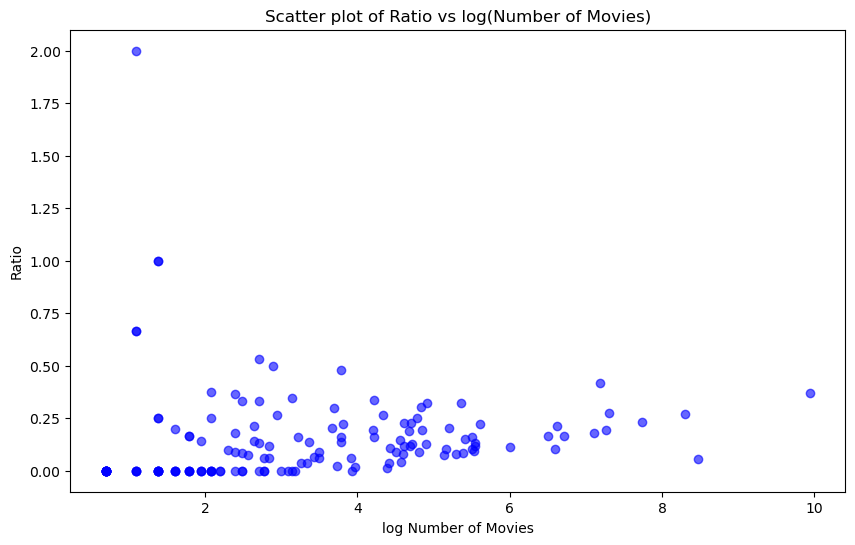

In [61]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))
plt.scatter(
    np.log(country_us_influence_df['Number of movies']), 
    country_us_influence_df['ratio'], 
    color='blue', 
    alpha=0.6
)

plt.title('Scatter plot of Ratio vs log(Number of Movies)')
plt.xlabel('log Number of Movies')
plt.ylabel('Ratio')

plt.show()

Here, we could perform clustering. Either geographic (Europe, Asia, etc.), or using a function to cluster based on the influence of the US, to see what’s most relevant. Then, we could create a scatterplot with each cluster, but with the circle size adjusted based on the number of movies in each cluster. K-means or K-medoids algorithms could be used to identify clusters of influence from the United States.

We could then test the quality of our clusters with the silhouette score.

In [62]:
unique_countries = list(country_us_influence_df['Country'].unique()) #liste des pays du dataset à clusterise

print(unique_countries)

['France', 'Soviet Union', 'Russia', 'United States of America', 'India', 'Australia', 'New Zealand', 'Canada', 'Germany', 'Czech Republic', 'United Kingdom', 'South Africa', 'Spain', 'Italy', 'Puerto Rico', 'China', 'South Korea', 'Greece', 'Hong Kong', 'Israel', 'Mexico', 'Switzerland', 'Belgium', 'Japan', 'Denmark', 'Bulgaria', 'Philippines', 'Ireland', 'Slovakia', 'Czechoslovakia', 'Norway', 'Sweden', 'Thailand', 'Armenia', 'German Democratic Republic', 'Afghanistan', 'Scotland', 'Costa Rica', 'Singapore', 'Netherlands', 'Argentina', 'Turkey', 'Finland', 'Mongolia', 'Morocco', 'England', 'Yugoslavia', 'Bosnia and Herzegovina', 'Lebanon', 'West Germany', 'Serbia', 'Democratic Republic of the Congo', 'Cambodia', 'Weimar Republic', 'Malaysia', 'Poland', 'Libya', 'Portugal', 'Pakistan', 'Venezuela', 'Indonesia', 'Korea', 'Zambia', 'Hungary', 'Brazil', 'Iceland', 'Taiwan', 'Burkina Faso', 'Slovenia', 'Croatia', 'Uzbek SSR', 'Bahamas', 'Vietnam', 'Egypt', 'Sri Lanka', 'Chile', 'Socialist

In [63]:
#Geographical clusterisation

def assign_geographical_region(country):
     # Europe
    europe = {
        'France', 'Germany', 'Czech Republic', 'United Kingdom', 'Italy', 'Spain', 'Switzerland', 'Belgium',
        'Denmark', 'Bulgaria', 'Ireland', 'Slovakia', 'Norway', 'Sweden', 'Greece', 'Portugal', 'Austria',
        'Poland', 'Hungary', 'Slovenia', 'Croatia', 'Romania', 'Luxembourg', 'Netherlands', 'Estonia',
        'Lithuania', 'Ukraine', 'Latvia', 'Montenegro', 'Albania', 'Serbia', 'Bosnia and Herzegovina',
        'Macedonia', 'Georgia', 'Armenia', 'Moldova', 'Finland', 'Iceland', 'Belarus', 'Malta',
        'Weimar Republic', 'Nazi Germany', 'German Democratic Republic', 'Czechoslovakia', 
        'Kingdom of Great Britain', 'Kingdom of Italy'
    }
    
    # North America
    north_america = {
        'United States of America', 'Canada', 'Mexico', 'Puerto Rico', 'Bahamas', 'Jamaica',
        'Panama', 'Cuba', 'Haiti', 'Bermuda', 'Aruba'
    }
    
    # South America
    south_america = {
        'Brazil', 'Argentina', 'Chile', 'Peru', 'Venezuela', 'Colombia', 'Uruguay', 'Bolivia',
        'Ecuador', 'Paraguay'
    }
    
    # Africa
    africa = {
        'South Africa', 'Morocco', 'Algeria', 'Egypt', 'Nigeria', 'Kenya', 'Zimbabwe', 'Libya',
        'Tunisia', 'Cameroon', 'Senegal', 'Mali', 'Guinea', 'Burkina Faso', 'Ethiopia',
        'Democratic Republic of the Congo', 'Ivory Coast', 'Zambia', 'Angola'
    }
    
    # East and Southeast Asia
    east_asia = {
        'China', 'Japan', 'South Korea', 'North Korea', 'Taiwan', 'Vietnam', 'Thailand', 'Philippines',
        'Indonesia', 'Malaysia', 'Singapore', 'Cambodia', 'Myanmar (Burma)', 'Hong Kong', 'Macau'
    }
    
    # South Asia
    south_asia = {
        'India', 'Pakistan', 'Bangladesh', 'Sri Lanka', 'Nepal', 'Bhutan', 'Maldives'
    }
    
    # Middle East
    middle_east = {
        'Israel', 'Turkey', 'Iran', 'Iraq', 'Saudi Arabia', 'United Arab Emirates', 'Qatar', 'Jordan',
        'Lebanon', 'Kuwait', 'Syria', 'Palestinian territories', 'Mandatory Palestine'
    }
    
    # Eastern Europe and Central Asia
    eastern_europe_central_asia = {
        'Russia', 'Ukraine', 'Kazakhstan', 'Uzbekistan', 'Turkmenistan', 'Georgia', 'Armenia',
        'Azerbaijan', 'Moldova', 'Kyrgyzstan', 'Tajikistan', 'Belarus', 'Soviet Union',
        'Soviet occupation zone', 'Georgian SSR', 'Ukrainian SSR', 'Uzbek SSR'
    }
    
    # Oceania
    oceania = {
        'Australia', 'New Zealand', 'Papua New Guinea', 'Fiji', 'Samoa', 'Tonga'
    }
    
    # Caribbean
    caribbean = {
        'Cuba', 'Jamaica', 'Haiti', 'Dominican Republic', 'Bahamas', 'Barbados'
    }
    
    # Check and assign region
    if country in europe:
        return 'Europe'
    elif country in north_america:
        return 'North America'
    elif country in south_america:
        return 'South America'
    elif country in africa:
        return 'Africa'
    elif country in east_asia:
        return 'East and Southeast Asia'
    elif country in south_asia:
        return 'South Asia'
    elif country in middle_east:
        return 'Middle East'
    elif country in eastern_europe_central_asia:
        return 'Eastern Europe and Central Asia'
    elif country in oceania:
        return 'Oceania'
    elif country in caribbean:
        return 'Caribbean'
    else:
        return 'Other'
    
country_us_influence_df['World_region'] = country_us_influence_df['Country'].apply(assign_geographical_region)

country_us_influence_df.head()

,Country,US_Term_Count,Number of movies,ratio,log_number_of_movies,World_region
0,France,531,2297,0.231171,7.739359,Europe
1,Soviet Union,30,255,0.117647,5.541264,Eastern Europe and Central Asia
2,Russia,18,217,0.082949,5.379897,Eastern Europe and Central Asia
3,United States of America,7657,20789,0.368320,9.942179,North America
4,India,262,4752,0.055135,8.466321,South Asia


In [ ]:
import seaborn as sns

plt.figure(figsize=(12, 6))
#sorted by median

sns.boxplot(x='World_region', y='ratio', data=country_us_influence_df, palette= sns.color_palette("husl"))



plt.title('Distribution of Ratio by world_region')
plt.xlabel('world region')
plt.ylabel('Ratio')


plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

NameError: name 'plt' is not defined

In [65]:
country_us_influence_df.groupby('World_region')['ratio'].std() #Checking the uniformity of the clusters regarding our feature

World_region
Africa                             0.094800
East and Southeast Asia            0.128923
Eastern Europe and Central Asia    0.059185
Europe                             0.148088
Middle East                        0.309140
North America                      0.611118
Oceania                            0.057340
Other                              0.123967
South America                      0.086291
South Asia                         0.262465
Name: ratio, dtype: float64

Things to improve : 
 - The US related terms to improve, manually or with a specific method
 - The geogrpahical clusterisation may not be relevant, we could find better cluster with KNN or medoïds


# Use of characters to represent culture.

In [119]:
df_character_cluster = pd.merge(df_cluster, df_characters, on='character_actor_freebase_id', how='inner')

df_character_influence = pd.merge(df_character_cluster, df_movies, on='wiki_id',  how='inner')

df_character_influence.info() #Dataframe containing the merging of the 3 dataframes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   cluster                      2666 non-null   object 
 1   character_actor_freebase_id  2666 non-null   object 
 2   wiki_id                      2666 non-null   int64  
 3   freebase_id_x                2666 non-null   object 
 4   release_date_x               2214 non-null   object 
 5   character                    2666 non-null   object 
 6   birth_date                   2570 non-null   object 
 7   gender                       2644 non-null   object 
 8   height                       1918 non-null   float64
 9   ethnicity_freebase_id        1451 non-null   object 
 10  name_x                       2666 non-null   object 
 11  age                          2385 non-null   float64
 12  character_freebase_id        2666 non-null   object 
 13  actor_freebase_id 

In [120]:
def extract_countries(country_str):
    countries = [entry.split(": ")[1].strip("}") for entry in country_str.split(", ") if ": " in entry]
    return countries

df_character_influence['countries'] = df_character_influence['countries'].apply(lambda x: extract_countries(x))


In [123]:
df_sorted_character = df_character_influence.sort_values(by=['cluster','release_date_x'])

df_first_appearance= df_sorted_character.groupby('cluster').first().reset_index()

df_first_appearance = df_first_appearance[['cluster','character_actor_freebase_id','name_x','name_y', 'release_date_x', 'countries']]

df_first_appearance.head()  #Raw dataframe with a few informations about the first appearance of the characters in cluster

,cluster,character_actor_freebase_id,name_x,name_y,release_date_x,countries
0,'Baby' Louise,/m/0h2cmv_,Elisabeth Moss,Gypsy,1993-12-12,"[""United States of America""]"
1,ACP Jai Dixit,/m/0220_c2,Abhishek Bachchan,Dhoom,2004-08-27,"[""India""]"
2,Abigail Chase,/m/0k14v6,Diane Kruger,National Treasure,2004-11-08,"[""United States of America""]"
3,Abraham Lincoln,/m/02tbdlx,Raymond Massey,Abe Lincoln in Illinois,1940-02-12,"[""United States of America""]"
4,Abraham Van Helsing,/m/0jxjsg,Edward Van Sloan,Dracula,1931-02-12,"[""United States of America""]"


In [128]:
all_countries = df_character_influence.groupby('cluster')['countries'].apply(lambda x: list(set([item for sublist in x for item in sublist]))).reset_index()   #Contains all the country of the films in which the character appears

all_countries.head()   

,cluster,countries
0,'Baby' Louise,"[""United States of America""]"
1,ACP Jai Dixit,"[""India""]"
2,Abigail Chase,"[""United States of America""]"
3,Abraham Lincoln,"[""United States of America""]"
4,Abraham Van Helsing,"[""United Kingdom"", ""United States of America"",..."


In [ ]:
df_first_appearance_tot = pd.merge(df_first_appearance, all_countries, on='cluster', how='left')   #Dataframe with the useful informations about character appearance 

df_first_appearance_tot.columns = ['Character', 'character_actor_freebase_id','actor_name','first_movie_name', 'release_date','origin_country','all_countries']

df_first_appearance_tot.head(10) 

,Character,character_actor_freebase_id,actor_name,first_movie_name,release_date,origin_country,all_countries
0,'Baby' Louise,/m/0h2cmv_,Elisabeth Moss,Gypsy,1993-12-12,"[""United States of America""]","[""United States of America""]"
1,ACP Jai Dixit,/m/0220_c2,Abhishek Bachchan,Dhoom,2004-08-27,"[""India""]","[""India""]"
2,Abigail Chase,/m/0k14v6,Diane Kruger,National Treasure,2004-11-08,"[""United States of America""]","[""United States of America""]"
3,Abraham Lincoln,/m/02tbdlx,Raymond Massey,Abe Lincoln in Illinois,1940-02-12,"[""United States of America""]","[""United States of America""]"
4,Abraham Van Helsing,/m/0jxjsg,Edward Van Sloan,Dracula,1931-02-12,"[""United States of America""]","[""United Kingdom"", ""United States of America"",..."
5,Ace Ventura,/m/0jt03v,Jim Carrey,Ace Ventura: Pet Detective,1994-02-04,"[""United States of America""]","[""United States of America""]"
6,Adolf Hitler,/m/0n637wj,Bobby Watson,Nazty Nuisance,1943-05-28,"[""United States of America""]","[""Hungary"", ""Canada"", ""Germany"", ""Italy"", ""Uni..."
7,Adrian Pennino,/m/0k2n02,Talia Shire,Rocky,1976-11-21,"[""United States of America""]","[""United States of America""]"
8,Agent Augustus Eugene Gibbons,/m/0k874n,Samuel L. Jackson,XXX,2002-08-09,"[""United States of America""]","[""United States of America""]"
9,Agent Smith,/m/0k5wz1,Hugo Weaving,The Matrix,1999-03-31,"[""United States of America"", ""Australia""]","[""United States of America"", ""Australia""]"


In [134]:
df_first_appearance_tot['number_countries'] = df_first_appearance_tot['all_countries'].apply(lambda x: len(x)) #adding the number of countries in which the character appear

df_first_appearance_tot.head()

,Character,character_actor_freebase_id,actor_name,first_movie_name,release_date,origin_country,all_countries,number_countries
0,'Baby' Louise,/m/0h2cmv_,Elisabeth Moss,Gypsy,1993-12-12,"[""United States of America""]","[""United States of America""]",1
1,ACP Jai Dixit,/m/0220_c2,Abhishek Bachchan,Dhoom,2004-08-27,"[""India""]","[""India""]",1
2,Abigail Chase,/m/0k14v6,Diane Kruger,National Treasure,2004-11-08,"[""United States of America""]","[""United States of America""]",1
3,Abraham Lincoln,/m/02tbdlx,Raymond Massey,Abe Lincoln in Illinois,1940-02-12,"[""United States of America""]","[""United States of America""]",1
4,Abraham Van Helsing,/m/0jxjsg,Edward Van Sloan,Dracula,1931-02-12,"[""United States of America""]","[""United Kingdom"", ""United States of America"",...",4


In [131]:
df_first_appearance_tot[df_first_appearance_tot['number_countries'] > 1].count()

Character                      428
character_actor_freebase_id    428
actor_name                     428
first_movie_name               428
release_date                   425
origin_country                 428
all_countries                  428
number_countries               428
dtype: int64

In [132]:
df_first_appearance_tot['number_countries'].sum()

1744

In [135]:
df_first_appearance_tot.describe()

,number_countries
count,970.000000
mean,1.797938
std,1.161116
min,0.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,8.000000


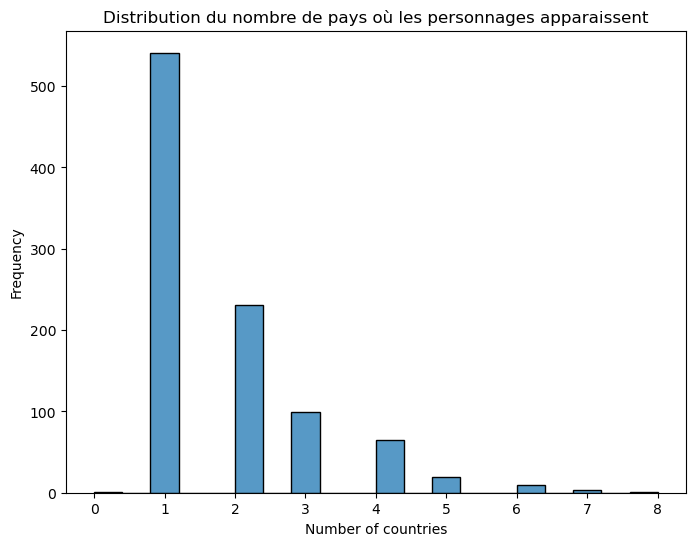

In [136]:
plt.figure(figsize=(8, 6))
sns.histplot(df_first_appearance_tot['number_countries'], kde=False, bins=20)

# Ajouter un titre et des labels
plt.title('Distribution du nombre de pays où les personnages apparaissent')
plt.xlabel('Number of countries')
plt.ylabel('Frequency')

# Afficher le plot
plt.show()

428 character on 970 that appears on movies in different countries --> not a huge sample. We'll have to keep this in mind when we'll test the significance of our studies

For the character that first appear in a coproduction, we can give 1 point for each countries 

774 points to be given overall

Can be improve if we take into account te co-production by giving 1 point for thr two producing countries

In [156]:
#find the character that appear in 8 countries and show all the origin countries one by one

df_first_appearance_tot[df_first_appearance_tot['number_countries'] == 8].head()



,Character,character_actor_freebase_id,actor_name,first_movie_name,release_date,origin_country,all_countries,number_countries
120,Cardinal Richelieu,/m/02vcspz,Charlton Heston,The Four Musketeers,1974-10-31,"[""United States of America"", ""Spain"", ""United ...","[""United Kingdom"", ""Panama"", ""Germany"", ""Spain...",8


We do not even see France for the Cardinal Richelieu. We have to label better the character origins. 970 characters to label. We could also guess the origin of the character through Natural language Processing like spaCy or Geoparse in the summary

We can also use some embeddings treatment models like transformers of Hugging Face to indentify implicit relation in the movie summary.

In [19]:
import spacy

In [11]:
nlp = spacy.load("en_core_web_sm")

# Exemple de résumé de film
resume = "The character travels through the streets of Paris, facing challenges that test his courage. He then fly straight to Spain"

# Appliquer le modèle NLP sur le texte
doc = nlp(resume)

# Extraire les entités géographiques (pays, villes, etc.)
pays_detectes = [ent.text for ent in doc.ents if ent.label_ == "GPE"]  # GPE = Geopolitical Entity

print(pays_detectes)

['Paris', 'Spain']


Nouvelle idée, grâce à ça on peut carrément récupérer les pays et les villes les plus reconnus dans les films --> influence géographique des autres pays c'est très bien

In [1]:
from transformers import pipeline

# Charger le pipeline de classification des entités
nlp = pipeline("zero-shot-classification")

# Exemple de résumé de film
resume = "The character, a French soldier, returns home after a long war."

# Définir les labels (ici des pays ou régions possibles)
labels = ["United States", "France", "India", "Germany"]

# Effectuer la classification
result = nlp(resume, candidate_labels=labels)

print(result)

No model was supplied, defaulted to facebook/bart-large-mnli and revision d7645e1 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.
c:\Users\Oscar\Nouveau dossier\envs\ada\lib\site-packages\huggingface_hub\file_download.py:139: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Oscar\.cache\huggingface\hub\models--facebook--bart-large-mnli. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this ar

{'sequence': 'The character, a French soldier, returns home after a long war.', 'labels': ['France', 'United States', 'India', 'Germany'], 'scores': [0.9858402609825134, 0.005204955581575632, 0.004836594220250845, 0.00411814684048295]}


In [12]:
# Charger le pipeline de classification des entités
nlp = pipeline("zero-shot-classification")

# Exemple de résumé de film
resume = "Poovalli Induchoodan  is sentenced for six years prison life for murdering his classmate. Induchoodan, the only son of Justice Maranchery Karunakara Menon  was framed in the case by Manapally Madhavan Nambiar  and his crony DYSP Sankaranarayanan  to take revenge on idealist judge Menon who had earlier given jail sentence to Manapally in a corruption case. Induchoodan, who had achieved top rank in Indian Civil Service loses the post and Manapally Sudheeran ([[Saikumar  enters the list of civil service trainees. We learn in flashback that it was Ramakrishnan  the son of Moopil Nair , who had actually killed his classmate. Six years passes by and Manapally Madhavan Nambiar, now a former state minister, is dead and Induchoodan, who is all rage at the gross injustice meted out to him - thus destroying his promising life, is released from prison. Induchoodan thwarts Manapally Pavithran  from performing the funeral rituals of Nambiar at Bharathapuzha. Many confrontations between Induchoodan and Manapally's henchmen follow. Induchoodan also falls in love with Anuradha ([[Aishwarya , the strong-willed and independent-minded daughter of Mooppil Nair. Justice Menon and his wife returns back to Kerala to stay with Induchoodan. There is an appearance of a girl named Indulekha ([[Kanaka , who claims to be the daughter of Justice Menon. Menon flatly refuses the claim and banishes her. Forced by circumstances and at the instigation and help of Manapally Pavithran, she reluctantly come out open with the claim. Induchoodan at first thrashes the protesters. But upon knowing the truth from Chandrabhanu his uncle, he accepts the task of her protection in the capacity as elder brother. Induchoodan decides to marry off Indulekha to his good friend Jayakrishnan . Induchoodan has a confrontation with his father and prods him to accept mistake and acknowledge the parentage of Indulekha. Menon ultimately regrets and goes on to confess to his daughter. The very next day, when Induchoodan returns to Poovally, Indulekha is found dead and Menon is accused of murdering her. The whole act was planned by Pavithran, who after killing Indulekha, forces Raman Nair  to testify against Menon in court. In court, Nandagopal Maarar , a close friend of Induchoodan and a famous supreme court lawyer, appears for Menon and manages to lay bare the murder plot and hidden intentions of other party . Menon is judged innocent of the crime by court. After confronting Pavithran and promising just retribution to the crime of killing Indulekha, Induchoodan returns to his father, who now shows remorse for all his actions including not believing in the innocence of his son. But while speaking to Induchoodan, Menon suffers a heart stroke and passes away. At Menon's funeral, Manapally Pavithran arrives to poke fun at Induchoodan and he also tries to carry out the postponed last rituals of his own father. Induchoodan interrupts the ritual and avenges for the death of his sister and father by severely injuring Pavithran. On his way back to peaceful life, Induchoodan accepts Anuradha as his life partner."

# Définir les labels (ici des pays ou régions possibles)
labels = ["USA", "France", "India", "Germany","Russia","Spain"]

# Effectuer la classification
result = nlp(resume, candidate_labels=labels)

print(result)

No model was supplied, defaulted to facebook/bart-large-mnli and revision d7645e1 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


{'sequence': "Poovalli Induchoodan  is sentenced for six years prison life for murdering his classmate. Induchoodan, the only son of Justice Maranchery Karunakara Menon  was framed in the case by Manapally Madhavan Nambiar  and his crony DYSP Sankaranarayanan  to take revenge on idealist judge Menon who had earlier given jail sentence to Manapally in a corruption case. Induchoodan, who had achieved top rank in Indian Civil Service loses the post and Manapally Sudheeran ([[Saikumar  enters the list of civil service trainees. We learn in flashback that it was Ramakrishnan  the son of Moopil Nair , who had actually killed his classmate. Six years passes by and Manapally Madhavan Nambiar, now a former state minister, is dead and Induchoodan, who is all rage at the gross injustice meted out to him - thus destroying his promising life, is released from prison. Induchoodan thwarts Manapally Pavithran  from performing the funeral rituals of Nambiar at Bharathapuzha. Many confrontations between

pas Mal à utiliser en plus on peut placer un threshold ce qui est très stylé en terme d'explication. Ca peut vraiment ajouter du contenu à nos analyses 

On peut aussi tester la précision sur plusieurs résumé qu'on aurait labelisé. regarder si on garde la precision, le recall, l'accuracy. On peut aussi faire varier un thershold quand on display ça pourrait être bien

F score aussi possible

In [14]:
import sys
sys.path.append('../scripts')

from process_data import process_data_2

df = process_data_2()
df.head()

,Country,US_Term_Count,Number of movies,ratio,log_number_of_movies,World_region
0,France,531,2297,0.231171,7.739359,Europe
1,Soviet Union,30,255,0.117647,5.541264,Eastern Europe and Central Asia
2,Russia,18,217,0.082949,5.379897,Eastern Europe and Central Asia
3,United States of America,7657,20789,0.368320,9.942179,North America
4,India,262,4752,0.055135,8.466321,South Asia


In [17]:
from importlib import reload
import process_data
reload(process_data)

<module 'process_data' from 'c:\\Users\\Oscar\\Project ADA\\ada-2024-project-teamcsx24\\src\\models\\../scripts\\process_data.py'>

In [18]:
import sys
sys.path.append('../scripts')

from process_data import process_data_character

df = process_data_character()
df.head()

,Character,character_actor_freebase_id,actor_name,first_movie_name,release_date,origin_country,all_countries,number_countries
0,'Baby' Louise,/m/0h2cmv_,Elisabeth Moss,Gypsy,1993-12-12,"[""United States of America""]","[""United States of America""]",1
1,ACP Jai Dixit,/m/0220_c2,Abhishek Bachchan,Dhoom,2004-08-27,"[""India""]","[""India""]",1
2,Abigail Chase,/m/0k14v6,Diane Kruger,National Treasure,2004-11-08,"[""United States of America""]","[""United States of America""]",1
3,Abraham Lincoln,/m/02tbdlx,Raymond Massey,Abe Lincoln in Illinois,1940-02-12,"[""United States of America""]","[""United States of America""]",1
4,Abraham Van Helsing,/m/0jxjsg,Edward Van Sloan,Dracula,1931-02-12,"[""United States of America""]","[""France"", ""Spain"", ""United States of America""...",4
